In [1]:
import os
import glob
from skimage import data, io, filters
import matplotlib.pyplot as plt
from IPython.display import display, Image
import PIL
import time
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib import cm


video_files = ["sample-covid.mp4", "sample-ncovid.mp4", "sample-smooth-pulm-edema.mp4"]
video_file = video_files[2]
video_name = os.path.splitext(video_file)[0]

if not os.path.exists(video_name):
    !mkdir $video_name
    !ffmpeg -i $video_file -f image2 "$video_name/video-frame%05d.png"

files = glob.glob(video_name+'/*.png')

files.sort()
print(type(files))
#print(files)  

<class 'list'>


(480, 640)
1.0


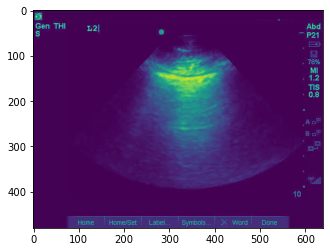

In [2]:
image_path = files[0]
image = rgb2gray(io.imread(image_path))
plt.imshow(image)
print(image.shape)
print(image.max())

In [3]:
len(files)

240

(9, 9, 3)


'\nprint(x[0,0])\nx[:,:,0].flat\nprint(x[:,:,0])\nprint(x[:,:,0].shape)\nprint(x)\n'

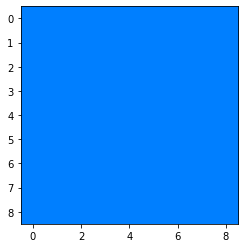

In [4]:
x = np.zeros((9,9,3))
print(x.shape)
x[:,:,0] = 0
x[:,:,1] = 0.5
x[:,:,2] = 1
plt.imshow(x)

'''
print(x[0,0])
x[:,:,0].flat
print(x[:,:,0])
print(x[:,:,0].shape)
print(x)
'''


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


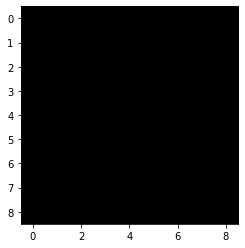

In [5]:
x = np.zeros((9,9,3))
x[:,:,0] = 1
x[:,:,1] = 1
x[:,:,2] = 1
y = np.std(x,2)
plt.imshow(y,'gray')
print(y)

In [6]:
# take the N first images and mulitple them together
N = len(files)
cube = np.zeros((image.shape[0], image.shape[1],N))
print(cube.shape)

image_path = files[0]
image_temp = rgb2gray(io.imread(image_path))
io.imsave('final/'+video_name+'_in.png',image_temp)

image_path = files[0]
for i in np.arange(0,N):
    image_path = files[i]
    image = rgb2gray(io.imread(image_path))
    cube[:,:,i] = image


    
    

'''
# mulitplying images together just made it go dark.
# adding worked better -- but it is just a smoothing effect.
# there must be a way to see which pixels are changing over time.
maybe just take the standard deviation and anything that has std=0, set those pixels to zero.


'''



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(480, 640, 240)


'\n# mulitplying images together just made it go dark.\n# adding worked better -- but it is just a smoothing effect.\n# there must be a way to see which pixels are changing over time.\nmaybe just take the standard deviation and anything that has std=0, set those pixels to zero.\n\n\n'

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


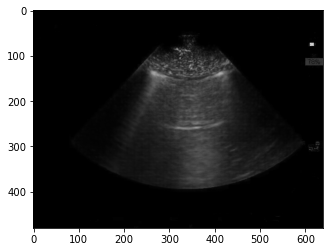

In [7]:
cube_std = np.std(cube,2)
cube_std /= cube_std.max()

print(cube_std.max())
plt.imshow(cube_std,'gray')
io.imsave('cube_std.png',cube_std)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


True
0.210166015625


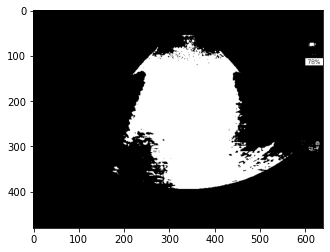

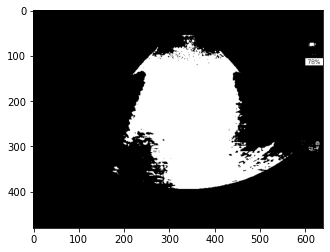

In [19]:
mask = cube_std > 0.1
print(mask.max())
plt.imshow(mask,'gray')
print(np.mean(mask))

binary = np.zeros(mask.shape)
binary[mask] = 255
plt.figure()
plt.imshow(binary,'gray')
io.imsave('mask.png',binary)



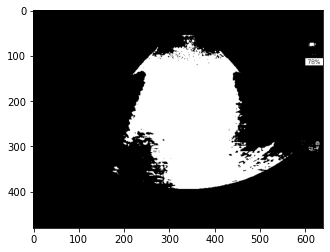

In [24]:
binary = np.zeros(mask.shape)
binary[mask] = 255
plt.figure()
plt.imshow(binary,'gray')


In [34]:
from skimage.measure import label

print(type(binary))

labels, num = label(binary,connectivity=2)
print(labels)
print(num)
plt.imshow(labels,'gray')
io.imsave('label.png',labels)

<class 'numpy.ndarray'>


ValueError: too many values to unpack (expected 2)

In [11]:

from skimage.morphology import max_tree

image = np.array([[15, 13, 16], [12, 12, 10], [16, 12, 14]])
P, S = max_tree(mask, connectivity=4)

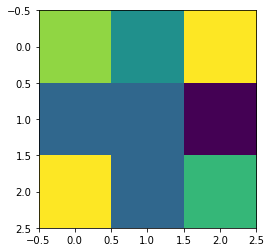

In [12]:
plt.imshow(image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<ipython-input-13-8aa94408bb95>:7: UserWarning: max_tree.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('max_tree.png',P>1)


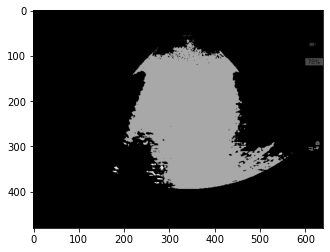

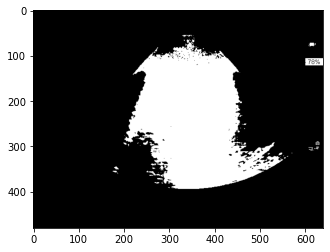

In [13]:
print(P)
plt.imshow(P,'gray')
P.max()
P.min()
plt.figure()
plt.imshow(P>1,'gray')
io.imsave('max_tree.png',P>1)

In [14]:
print(S)

[     0 202366 202367 ...  62423  62416 133490]


<ipython-input-15-4bc85edfc7e6>:5: UserWarning: final/sample-smooth-pulm-edema_out.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('final/'+video_name+'_out.png',chull)


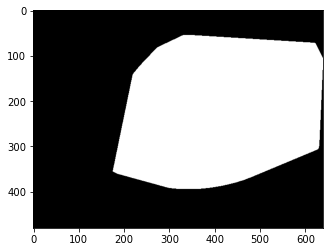

In [15]:
from skimage.morphology import convex_hull_image

chull = convex_hull_image(P>1)
plt.imshow(chull,'gray')
io.imsave('final/'+video_name+'_out.png',chull)

In [16]:
video_name+'_out.png'

'sample-smooth-pulm-edema_out.png'